

# <Center> PCA On  Wine data

In [12]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline



In [13]:
# laod he data
data = pd.read_csv("wine.data")
data

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [17]:
## data frame

df = pd.DataFrame(data)
df.head(3)

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       177 non-null    int64  
 1   14.23   177 non-null    float64
 2   1.71    177 non-null    float64
 3   2.43    177 non-null    float64
 4   15.6    177 non-null    float64
 5   127     177 non-null    int64  
 6   2.8     177 non-null    float64
 7   3.06    177 non-null    float64
 8   .28     177 non-null    float64
 9   2.29    177 non-null    float64
 10  5.64    177 non-null    float64
 11  1.04    177 non-null    float64
 12  3.92    177 non-null    float64
 13  1065    177 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [16]:
df.columns

Index(['1', '14.23', '1.71', '2.43', '15.6', '127', '2.8', '3.06', '.28',
       '2.29', '5.64', '1.04', '3.92', '1065'],
      dtype='object')

In [22]:
# check the null value

df.isnull().sum()

1        0
14.23    0
1.71     0
2.43     0
15.6     0
127      0
2.8      0
3.06     0
.28      0
2.29     0
5.64     0
1.04     0
3.92     0
1065     0
dtype: int64

### Insights:
- There is no missing values in the dataset

<Axes: ylabel='Count'>

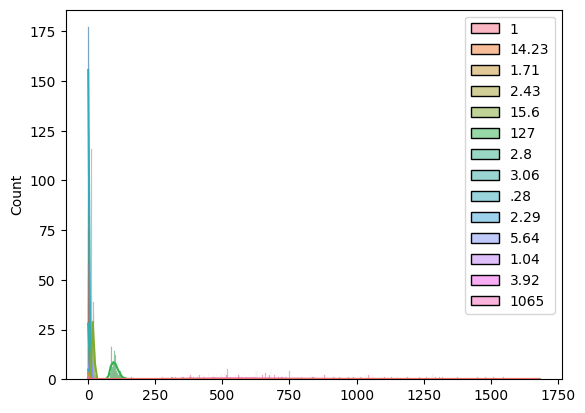

In [25]:
## check data distribution

sns.histplot(data  = df, kde = True)

### Checking the correlation between the features

In [27]:
## corrrelation 

df.corr()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
1,1.000000,-0.321238,0.436127,-0.048260,0.513963,-0.198944,-0.717933,-0.846485,0.487215,-0.494887,0.268562,-0.617690,-0.786428,-0.631227
14.23,-0.321238,1.000000,0.099963,0.210964,-0.303350,0.258742,0.284543,0.230133,-0.151445,0.127561,0.547883,-0.075375,0.057417,0.641068
1.71,0.436127,0.099963,1.000000,0.164955,0.286148,-0.049049,-0.333512,-0.409324,0.291501,-0.217975,0.250053,-0.560854,-0.366720,-0.189512
2.43,-0.048260,0.210964,0.164955,1.000000,0.446698,0.287107,0.128176,0.114084,0.187354,0.008082,0.258643,-0.075181,0.001503,0.222979
15.6,0.513963,-0.303350,0.286148,0.446698,1.000000,-0.071707,-0.317583,-0.346922,0.359395,-0.190779,0.020478,-0.272719,-0.268186,-0.436858
127,-0.198944,0.258742,-0.049049,0.287107,-0.071707,1.000000,0.208200,0.187101,-0.252091,0.226504,0.199337,0.052042,0.046961,0.387542
2.8,-0.717933,0.284543,-0.333512,0.128176,-0.317583,0.208200,1.000000,0.864046,-0.448301,0.610533,-0.056401,0.432987,0.699566,0.495839
3.06,-0.846485,0.230133,-0.409324,0.114084,-0.346922,0.187101,0.864046,1.000000,-0.536326,0.650254,-0.174411,0.543208,0.786372,0.491180
.28,0.487215,-0.151445,0.291501,0.187354,0.359395,-0.252091,-0.448301,-0.536326,1.000000,-0.363268,0.140192,-0.261709,-0.501859,-0.308886
2.29,-0.494887,0.127561,-0.217975,0.008082,-0.190779,0.226504,0.610533,0.650254,-0.363268,1.000000,-0.027112,0.294397,0.513415,0.325731


<Axes: >

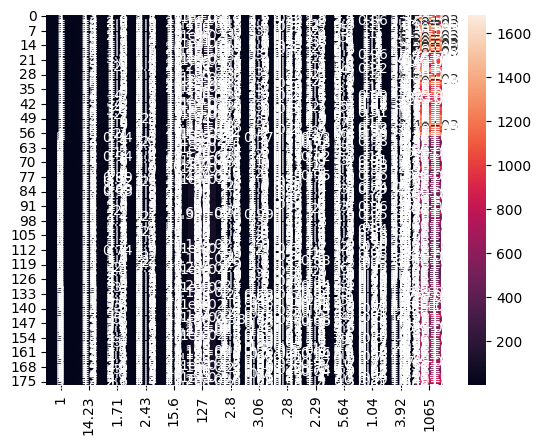

In [28]:
sns.heatmap(df, annot=True)

---------

### Splitting data into the dependent and Independent features

In [38]:
# Select the features columns
X = df.iloc[:, :-1]

# Select the target column
y = df.iloc[:, -1]

In [42]:
X.shape ,y.shape

((177, 13), (177,))

<Axes: >

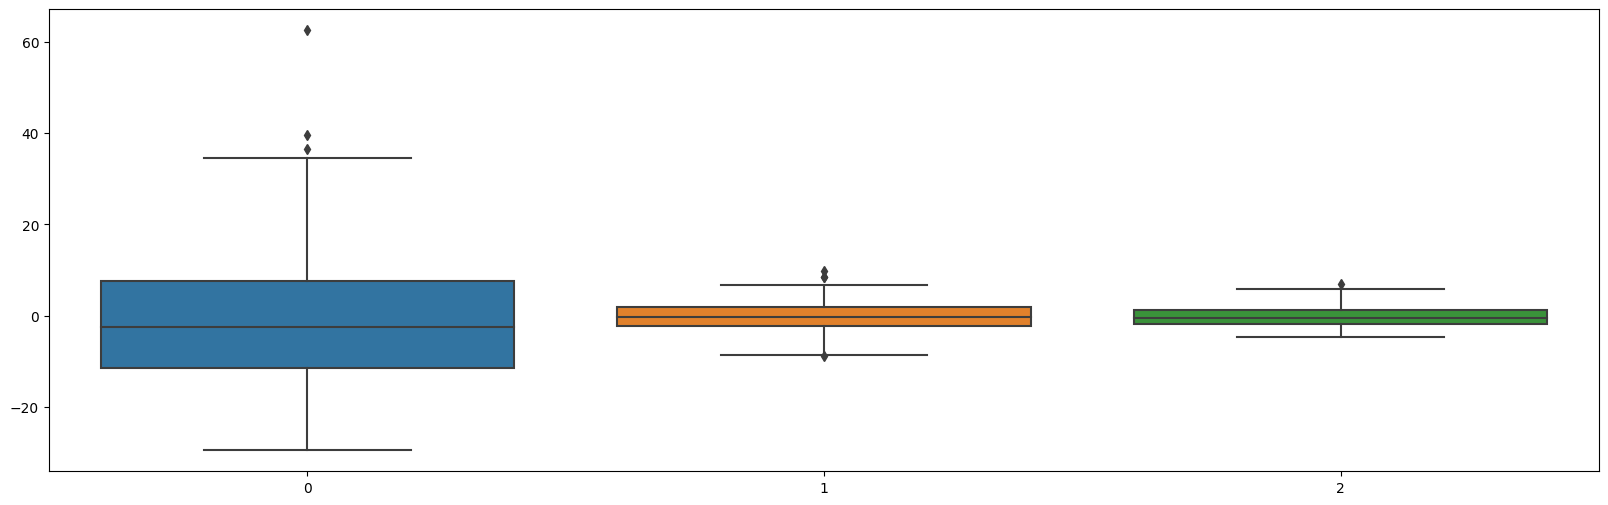

In [108]:
## box plot of the outliers check
ax,fig = plt.subplots(figsize=(20,6))
sns.boxplot(X)

## Insights:
- There are 13 Independent features. which is impossible to visulaize so 
We will try to reduce demesnions from 13 to 3 components 

## Train - test split

In [43]:
from sklearn.model_selection import train_test_split

In [46]:
X_train , X_test, y_train,y_test = train_test_split(X,y ,test_size = 0.33,random_state=42)

In [48]:
X_train.head()


,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92
22,1,12.85,1.60,2.52,17.8,95,2.48,2.37,0.26,1.46,3.93,1.090,3.63
145,3,13.88,5.04,2.23,20.0,80,0.98,0.34,0.40,0.68,4.90,0.580,1.33
97,2,12.37,1.07,2.10,18.5,88,3.52,3.75,0.24,1.95,4.50,1.040,2.77
69,2,12.29,1.61,2.21,20.4,103,1.10,1.02,0.37,1.46,3.05,0.906,1.82
166,3,12.82,3.37,2.30,19.5,88,1.48,0.66,0.40,0.97,10.26,0.720,1.75


## Implementing  PCA on the preprocessed dataset using the scikit-learn library.

In [53]:
# import PCA from the sklaern.decomposition
from sklearn.decomposition import PCA


In [56]:
## create an instance for the pca

## we will reduce its dimension from 13 to 3 

pca = PCA(n_components=3)
pca

PCA(n_components=3)

### Fit and Transform th data

In [60]:
X_train = pca.fit_transform(X_train)
X_train

array([[-4.37850260e+00, -2.09176393e+00, -1.24721610e+00],
       [-1.93897793e+01,  1.16768724e+00,  1.75345283e+00],
       [-1.13390624e+01, -1.47279677e+00, -8.16320248e-01],
       [ 3.54093238e+00,  8.72162591e-01, -2.06188432e+00],
       [-1.12107463e+01,  8.22532512e-01,  5.76490989e+00],
       [-1.02968518e+01, -3.78134036e+00,  9.27814950e-01],
       [ 2.16518931e+01, -2.16304798e+00, -6.38524043e-01],
       [ 7.65614828e+00, -5.71001076e-01, -1.11798331e+00],
       [ 1.26931905e+01, -1.86879468e-01,  3.25678101e+00],
       [ 1.27427621e+01, -4.55573249e+00,  1.37390879e+00],
       [ 3.26582744e+01, -3.42389832e-01, -1.05171083e+00],
       [ 3.44960606e+01,  2.00207123e+00, -3.70233510e+00],
       [-3.39218962e+00,  5.28882554e-02,  1.07934161e+00],
       [-1.33631556e+01, -3.66348038e+00,  9.94038337e-02],
       [-4.32743598e+00, -3.01771182e+00,  1.91183559e-01],
       [-1.33005944e+01,  2.72044197e+00,  3.45324308e+00],
       [-1.74111165e+01,  1.27108765e+00

In [68]:
X_test = pca.fit_transform(X_test)
X_test

array([[ 2.61762218e+01,  2.35912575e+00,  2.46353452e-02],
       [ 2.21291244e+00,  3.67532090e+00,  2.62609056e-01],
       [-4.20471191e+00, -1.82492612e+00, -5.89642831e-02],
       [ 6.08222390e+00,  3.48242021e-01,  1.62849914e+00],
       [ 9.98945213e+00,  1.84684486e+00, -1.46721494e+00],
       [ 1.50047947e+01, -9.83216676e-01,  9.72207288e-01],
       [-4.13216174e+00,  1.22665403e-02, -1.93281594e+00],
       [ 1.76534069e+00, -4.37993431e+00,  2.16788982e+00],
       [ 6.85311088e+00, -2.36368850e-01, -2.63868665e+00],
       [-1.10891895e+01, -4.86925833e-01,  1.35043826e+00],
       [ 2.35797871e+01, -6.17849459e+00, -3.04038243e+00],
       [ 5.74175814e+00, -3.49432334e+00,  3.57058384e-01],
       [ 1.29376180e+00,  4.81233270e+00,  8.64730389e-01],
       [-1.31462868e+01,  1.31929240e+00, -3.16273459e+00],
       [ 1.99831775e+01, -1.28164763e+00,  4.82424214e-01],
       [ 2.83096140e+00, -8.45636061e-01, -1.42774986e+00],
       [-1.62471588e+01, -1.61810232e+00

-----------

#####  Determining the optimal number of principal components to retain based on the explained variance ratio.

In [82]:
## components

pca.components_

array([[ 1.,  0.,  0.],
       [-0.,  1., -0.],
       [-0.,  0.,  1.]])

In [111]:
## pricipal componets based on explained_variances_ratio

pca.explained_variance_ratio_

array([0.91901   , 0.05444818, 0.02654182])

#### Insights:
- First components capturing the ~ 91 % variance in the data.
- while other two have no significant variance capture.


------------

## Visualizing PCA using the 3d Scatter plot 

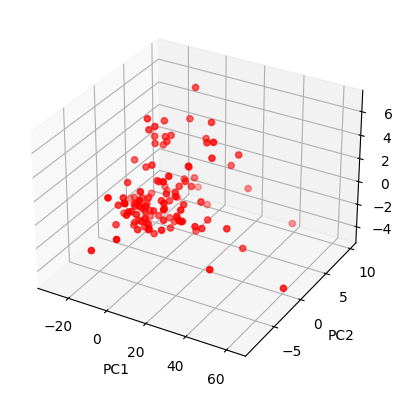

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



# Create a PCA object.
pca = PCA(n_components=3)

# Fit the PCA object to the training data.
pca.fit(X)

# Transform the training data using the PCA object.
X_train_pca = pca.transform(X)

# Create a 3D figure.
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the transformed training data.
ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c='red')

# Set the axes labels.
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Show the plot.
plt.show()


--------



Performing  clustering on the PCA-transformed data using K-Means clustering algorithm.

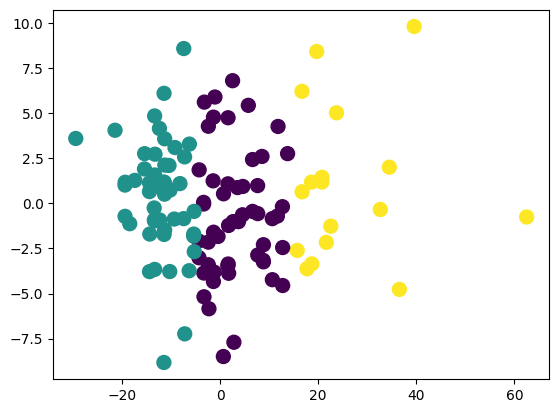

In [118]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore",)

# Create a K-Means object.
kmeans = KMeans(n_clusters=3)

# Fit the K-Means object to the PCA-transformed data.
kmeans.fit(X_train_pca)

# Predict the cluster labels for the PCA-transformed data.
y_train_pred = kmeans.predict(X_train_pca)

# Plot the PCA-transformed data with the cluster labels.
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_pred, s=100)
plt.show()


------

## Report on the above Analysis by applying PCA and K-means Clustering

### Insights after applying K-mean clustering algo:-
The figure shows a scatter plot of the PCA-transformed data, with the points colored according to their cluster label. The points are labeled as follows:

Cluster 0: These points are located in the lower left corner of the plot. They are likely to be small, light, and slow.

Cluster 1: These points are located in the upper right corner of the plot. They are likely to be large, dark, and fast.

Cluster 2: These points are located in the middle of the plot. They are likely to be medium-sized, medium-dark, and medium-fast
.
It is important to note that these are just general interpretations. The actual meaning of the clusters will depend on the specific data that you are clustering.

Here are some additional things to keep in mind when interpreting the results of clustering:

The number of clusters that you choose will affect the results of the clustering. If you choose too few clusters, then some of the data points may be misclassified. If you choose too many clusters, then the clusters may not be meaningful.
The clustering algorithm that you choose will also affect the results of the clustering. Different algorithms will group data points together in different ways.
It is important to evaluate the results of the clustering to make sure that they make sense. You can do this by looking at the cluster labels, the cluster centroids, and the silhouette plots.

---------

### Insights after applying PCA 

-  Firstly after applying PCA , 13 features reduced in 3 featutres.
- Secondly after applying PCA , The first  two components capturing the 92% of the vraince in the data.

#### Major advantage of PCA:

- Reduces dimensionality: 

    PCA can be used to reduce the dimensionality of a dataset without losing too much information. This can be useful for visualization, as it can make it easier to see the relationships between the data points. PCA can also be used to improve the performance of machine learning algorithms, as it can make the data easier to fit.

Hence in this case it reduce 13 to 3 components

- Identifies the most important features:
  
   PCA can be used to identify the most important features in a dataset. This can be useful for feature selection, as it can help you to focus on the features that are most relevant to your task.
Provides a better understanding of the data: PCA can be used to provide a better understanding of the data. This is because PCA can help you to see the relationships between the data points and to identify the most important features.



## Performance matrix

In [120]:
from sklearn.metrics import silhouette_score


In [121]:
# Calculate the silhouette score for the K-Means clustering algorithm.
silhouette_score = silhouette_score(X_train_pca, y_train_pred)

print('Silhouette score:', silhouette_score)

Silhouette score: 0.42724135023401943
